# <center><font color='orange'>ΑΣΚΗΣΗ 1 </font>| `Επιβλεπόμενη Μάθηση` : `Ταξινόμηση`<center>
<p style="text-align: right;"><font color='grey'>
Εργαστήριο Τεχνητής Νοημοσύνης και Μηχανικής Μάθησης
<br>
Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα
</font>
<br><br>
**Ευδοκία Μπαρουξή** (*16586*) | **Τζανακάκης Γιάννης** (*14436*)
<br>
<p style="text-align: right;"><font color='grey'>
Αριθμός Ομάδας: 83
</font>
</p>

# Εισαγωγή
Σκοπός της παρούσας εργασίας είναι η εξοικείωση με έννοιες και η εφαρμογή μεθόδων της Επιβλεπόμενης Μηχανικής Μάθησης για το **Classification** (Ταξινόμηση, Κατηγοριοποίηση) δεδομένων ως προς ένα σύνολο γνωρισμάτων/μεταβλητών, καθώς και η σύνταξη μιας παρουσίασης της παραπάνω διαδικασίας, με χρήση markdown formatting, στο περιβάλλον του `Jupyter`.

Για την ανάλυση , θα χρησιμοποιηθούν 2 σύνολα δεδομένων (διαφορετικού μεγέθους), από τη συλλογή του **UCI Machine Learning Repository**, κάτω από το σύνδεσμο: https://archive.ics.uci.edu/ml/datasets/.

Ο παρακάτω πίνακας περιέχει κάποιες βασικές πληροφορίες για τα 2 datasets που ανατέθηκαν στην ομάδα μας:

| Όνομα | Πεδίο | Στιγμιότυπα | Μεταβλητές | Πεδίο Τιμών | Κλάσεις | NAs |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Ionosphere | Φυσική | 351 | 34 | Πραγματικοί | 2 | Όχι
| Isolet | Computing | 7797 | 617 | Πραγματικοί | 26 | Όχι 
Καλούμαστε να βρούμε για κάθε classifier (πέρα από τους dummy) σε κάθε dataset:
>1. Τη **βέλτιστη αρχιτεκτονική μετασχηματιστών** (στάδια προ-επεξεργασίας).
>2. Τις **βέλτιστες υπερ-παραμέτρους** μέσω `grid search` και `cross validation`.

Το Κεφάλαιο 3 αναφέρεται στην ανάλυση του Ionosphere Dataset (small dataset) και το Κεφάλαιο 4 στη μελέτη του Isolet Dataset (big dataset), αντίστοιχα. Αναλυτικότερα τα Κεφάλαια και οι παράγραφοι, αναφέρονται στον πίνακα περιεχομένων της παρουσίασης.

<div class="alert alert-warning">
  <strong>Προαπαιτούμενες Βιβλιοθήκες:</strong>
</div>
<br>
Για την αναπαραγωγή του κώδικα της εργασίας, απαιτείται η εγκατάσταση ορισμένων βιβλιοθηκών, μέσω των παρακάτω (ή αντίστοιχων) εντολών:

>  `pip3 install numpy`

>  `pip3 install pandas`

>  `pip3 install seaborn`

>  `pip3 install matplotlib`

>  `pip3 install sklearn`

>  `pip3 install imblearn`


# Ionosphere Dataset

Λίγα λόγια για την προέλευση των δεδομένων:
<div class="alert alert-block alert-info">
Τα δεδομένα του Ionosphere dataset, συλλέχθηκαν από ένα **τηλεπικοινωνιακό σύστημα** στο Goose Bay, Labrador. Το σύστημα περιελάμβανε **συστοιχία 16 κεραιών υψηλών συχνοτήτων**, με δυνατότητα εκπομπής ισχύος της τάξης των 6.5 kW. Στόχος ήταν τα **ελεύθερα ηλεκτρόνια στην Ιονόσφαιρα** του πλανήτη μας.
<br> <br>
Τα εκπομπόμενα σήματα που επέστρεφαν στη γη, κατηγοριοποιούνταν ως "**καλά**", αφού μαρτυρουσαν ύπαρξη δομής στην Ιονόσφαιρα. Αντίθετα, τα σήματα που δεν επέστρεφαν στη γη χαρακτηρίζονταν ως "**κακά**". Η στήλη class του dataframe, με τιμές στο δισύνολο {b,g} αποτελεί την κωδικοποίηση του εν λόγω χαρακτηρισμού. 
<br> <br>
Τα σήματα που επέστρεφαν, επεξεργάζονταν μέσω μιας συνάρτησης παλινδρόμησης με ορίσματα τον **χρόνο** και τον **κωδικό** ενός εκπομπόμενου **παλμού**. Υπήρχαν συνολικά 17 διαφορετικοί παλμοί στο σύστημα. Τα στιγμιότυπα (γραμμές) του dataframe περιγράφονται από 2 τιμές για καθέναν από τους 17 παλμούς (2 τιμές για κωδικοποίηση του ηλεκτρομαγνητικού κύματος -μιγαδικό σήμα- που επρόκειτο να εκπέμψει ο παλμός). 
</div>
 <br>
`Παραχωρήθηκε από:`

>*Space Physics Group, Applied Physics Laboratory, Johns Hopkins University*.


`Σχετικό Άρθρο:`

>*Sigillito, V. G., Wing, S. P., Hutton, L. V., \& Baker, K. B. (1989).
<br>
Classification of radar returns from the ionosphere using neural networks.
<br>
Johns Hopkins APL Technical Digest, 10, 262-266*.

<p style="text-align: right;"> Πηγή: https://archive.ics.uci.edu/ml/datasets/ionosphere </p>

## Προεπεξεργασία του Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

pd.options.display.max_columns = None #εμφάνισε όλες τις στήλες

### Μια πρώτη ματιά

Το dataframe περιέχει **35 στήλες**-attributes. Δύο για κάθε παλμό -όπως περιγράφηκε παραπάνω- άρα $2\cdot17=34$ στήλες καθώς και τη στήλη της κατηγορίοποίησης του κάθε στιγμιοτύπου. Ξεκινούμε την εξερεύνηση του dataset, τυπώνοντας μια στατιστική περίληψη των attributes:

In [2]:
df = pd.read_csv('ionosphere_ds.csv')
#στατιστικά των 34 ποσοτικών μεταβλητων-στηλών
df.describe()


,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
#και η 35η στήλη της κατηγοριοποίησης
pd.DataFrame(df.loc[:,'label']).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350
label,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,b,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g


### Περιττά Δεδομένα & ΝAs

Μελετώντας την παραπάνω στατιστική περίληψη των μεταβλητών, παρατηρούμε ότι η **δεύτερη στήλη** (όνομα μεταβλητης: `a02`) του dataframe (και μοναχά αυτή) έχει **μηδενική διακύμανση**, άρα είναι **αδιάφορη στήλη** και μπορούμε να την αφαιρέσουμε από το dataframe, στο πλαίσιο της μελέτης μας:

In [297]:
#df.drop(columns = ['a02'], inplace = True)
#df.iloc[:3,:4]
#επιλέξαμε να αφαιρέσουμε τις στήλες με χαμηλή/μηδενική διακύμανση, στο grid search

Επιπλέον, επιβεβαιώνουμε την πληροφορία από το description του dataset, ότι **δεν περιέχει missing values** (NAs):

In [4]:
df.isna().any().any()

False

### Κωδικοποίηση των labels

To PyTorch, δέχεται ως είσοδο -στις loss functions- ακέραιους αριθμούς, ως δείκτες για την κατηγοριά (class) στην οποία ανήκει το κάθε στιγμιότυπο.
Συνεπώς, θα χρειαστεί να αλλάξουμε το format των τιμών στη στήλη label του dataframe, από "g" (goob signal) ή "b" (bad signal) σε 1 και 0, αντίστοιχα.
Επίσης, μετατρέπουμε τις παρατηρήσεις των μη διατάξιμων μεταβλητων - εδώ η λογική μεταβλητή στη στήλη `a01`- σε πραγματικούς αριθμούς.

Στην έξοδο του επόμενου κελιού, βλέπουμε τη μετασχηματισμένη στήλη των labels:

In [5]:
df['label'] = df.label.astype('category')   

encoding = {'g': 1, 'b': 0}
df.label.replace(encoding, inplace = True)

df['a01'] = df.a01.astype('float64')

pd.DataFrame(df.loc[:,'label']).transpose()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350
label,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Κατανομή των labels

Όπως βλέπουμε, το dataset παρουσιάζει **ανισορροπία** μεταξύ των στιγμιοτύπων-σημάτων που έχουν χαρακτηριστεί ως g ή b (good ή bad)

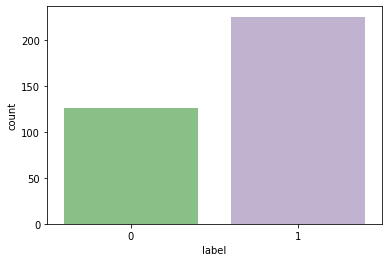

In [6]:
sns.countplot(x = 'label', data = df, palette = "Accent")

In [7]:
df['label'].value_counts() #εμφανίσεις 0 και 1 στη στήλη label

1    225
0    126
Name: label, dtype: int64

Οι συχνότητες εμφάνισης των 2 κλάσεων -καλά/κακά σήματα- είναι $\frac{225}{351}\approx0.64$ και $\frac{126}{351}\approx0.36$ αντίστοιχα.

Η κλάση "`good signal`" είναι $\frac{64}{36} = 1.7\bar{7}$ φορές συχνότερη από την κλάση "`bad signal`".

Συνεπώς, το dataset κρίνεται ως **μη ισορροπημένο**.

### Seperation & Split

Χωρίζουμε τις ανεξάρτητες από τις εξαρτημένες μεταβλητές (seperation). Η είσοδος Χ θα έχει **33 μεταβλητές** (34 - σταθερή μεταβλητή `a02`) και **351 παρατηρήσεις** και η έξοδος y θα είναι ένα διάνυσμα με τον ίδιο αριθμό παρατηρήσεων:

In [8]:
X = df.values[:, :-1]
X.shape

(351, 34)

In [9]:
y = df.values[:, -1]
y.shape

(351,)

Υλοποιούμε το **διαχωρισμό** του dataset, σε **train** και **test** set (split), και κανονικοποιούμε τις παρατηρήσεις (scale), με τη βοήθεια των `train_test_split` και `StandardScaler` αντίστοιχα, από τη βιβλιοθήκη `sklearn`:

In [2]:
from sklearn.model_selection import train_test_split

In [10]:
# η παράμετρος random_state είναι ο seed για το shuffling.
# κάνει την έξοδο του αλγορίθμου αναπαράξιμη (reproducible output)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

len(x_test)

71

## Εποπτεία Διαχωρισμών

Η οπτικοποίηση των δεδομένων του trainset (`x_train`) θα μας δώσει μια ιδέα για το πόσο σύνθετο θα είναι το πρόβλημα της ταξινόμησής τους.

Θα κάνουμε χρήση 2 αλγορίθμων απεικόνισης, οι οποίοι περιέχονται στη βιβλιοθήκη sklearn:

>### t-SNE `(t-distributed stochastic neighbor embedding)`

1. Προβολή ν-διάστατων στιγμιοτύπων στο κανονικό επίπεδο, σεβόμενοι τη **σχετική** τους απόσταση. 
2. Ελαχιστοποίηση Kullback-Leibler.
3. Non convex cost function, συνεπώς διαφορετικές απεικονίσεις σε κάθε επανάληψη. 

Τρέχουμε τον αλγόριθμο 2 φορες και επιβεβαιώνουμε πειραματικά:

In [11]:
from sklearn.manifold import TSNE

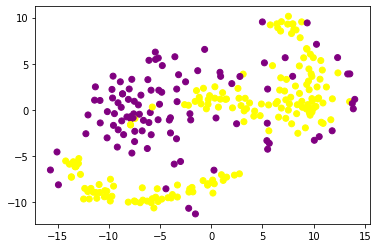

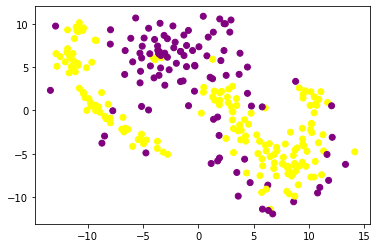

In [12]:
# πρώτο τρέξιμο t-SNE
x_embedded = TSNE(n_components = 2).fit_transform(x_train)

plt.scatter(x_embedded[:, 0], 
           x_embedded[:, 1], 
           color=['yellow' if label else 'purple' for label in y_train])
plt.show()

# δεύτερο τρέξιμο t-SNE
x_embedded = TSNE(n_components = 2).fit_transform(x_train)

plt.scatter(x_embedded[:, 0], 
           x_embedded[:, 1], 
           color=['yellow' if label else 'purple' for label in y_train])
plt.show()

>### PCA `(Principal Component Analysis)`

1. Επαναπροσδιορισμός συστήματος συντεταγμένων.
2. Aποτέλεσμα ενός γραμμικού συνδυασμού προερχόμενου από τις αρχικές μεταβλητές.
3. Eκπροσωπούνται σε ορθογώνιο άξονα.
4. Tα επικείμενα σημεία διατηρούν μια φθίνουσα σειρά στην τιμή της διακύμανσής τους.

In [13]:
from sklearn.decomposition import PCA

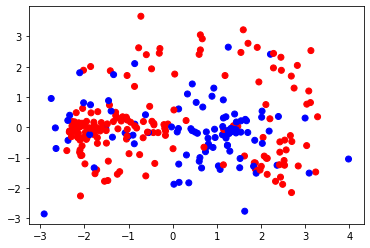

In [14]:
x_embedded = PCA(n_components = 2).fit_transform(x_train)

plt.scatter(x_embedded[:, 0], 
            x_embedded[:, 1], 
            color = ['red' if label else 'blue' for label in y_train])

plt.show()

Από τις παραπάνω απεικονίσεις, προκύπτει ότι μελετάμε ένα σχετικά **απλό σύνολο**. Δοκιμάζοντας t-SNE απεικονίσεις, μπορούμε να πετύχουμε σχεδόν / ακόμη και γραμμικό διαχωρισμό.

Περιμένουμε υψηλή ακρίβεια από το μοντέλο μας. 

## Ταξινόμηση

### Baseline Classification

Θα ξεκινήσουμε τη μοντελοποίηση, εκτελώντας ορισμένες dummy στρατηγικές ταξινόμησης του dataset μας. Οι dummy classifiers ταξινομούν με κάποιους απλούς κανόνες-στρατηγικές τα δεδομένα. Χρησιμοποιούνται ως benchmarks για το scaling και ranking άλλων μοντέλων.


Θα χρησιμοποιήσουμε τον `DummyClassifier`της sklearn για να εξετάσουμε την ακρίβεια όλων των διαθέσιμων στρατηγικών:

In [22]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix 

In [16]:
strategies = ['most_frequent', 'stratified', 'uniform', 'constant'] 
dummy_scores = [] 
con_matrices = []

for s in strategies: 
    
    if s =='constant': 
        dclf = DummyClassifier(strategy = s, constant = 1) 
    else: 
        dclf = DummyClassifier(strategy = s) 
        
    dclf.fit(x_train, y_train)

    dummy_scores.append(dclf.score(x_test, y_test)) 
    con_matrices.append(confusion_matrix(y_test, dclf.predict(x_test)))

Ας δούμε τους πίνακες σύγχυσης των dummy στρατηγικών:

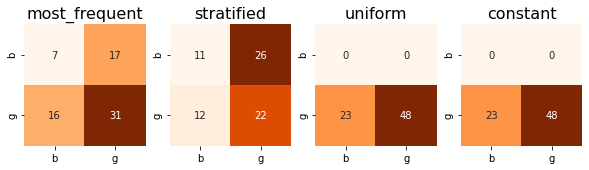

In [31]:
fig, ax_lst = plt.subplots(1,4,figsize=(10,7))

for i,ax in zip(range(4), ax_lst.flat):
    hmap = sns.heatmap(
         con_matrices[i].T,
         cmap = 'Oranges',
         square = True,
         annot = True, 
         fmt = 'd',
         cbar = False,
         xticklabels = ['b','g'],
         yticklabels = ['b','g'])

    # Plot heatmap
    plt.sca(ax) # make the ax object the "current axes"
    plt.title(strategies[i], fontsize=16)
    plt.plot()
    
plt.show()

Και ένα plot των scores τους:

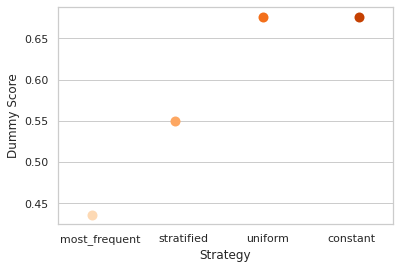

In [32]:
dummy_scores.sort()    
sns.set_theme(style = "whitegrid")

ax = sns.stripplot(x = strategies, y = dummy_scores, size = 10, palette = 'Oranges')
plt.xlabel('Strategy', fontsize=12)
plt.ylabel('Dummy Score', fontsize=12)
plt.show()

### Gaussian Naive Bayes

Ας δούμε πως ταξινομεί τα δεδομένα μας ο Gaussian Naive Bayes ταξινομητής:

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

#### Ένας απλός NB Ταξινομητής 

Για αρχή, κάνουμε μια **baseline ταξινόμηση**, με έναν απλό ταξινομητή, χωρίς επεξεργασία παραμέτρων:

In [42]:
nbclf = GaussianNB()

nbclf.fit(x_train,y_train)
pred = nbclf.predict(x_test)

              precision    recall  f1-score   support

 good_signal       1.00      0.65      0.79        23
  bad_signal       0.86      1.00      0.92        48

    accuracy                           0.89        71
   macro avg       0.93      0.83      0.86        71
weighted avg       0.90      0.89      0.88        71



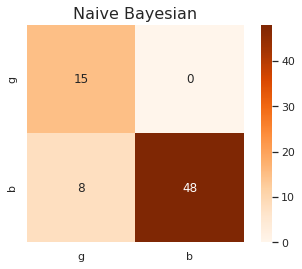

In [43]:
target_names = ['good_signal', 'bad_signal']
print(classification_report(y_test, pred, target_names=target_names))

confusion = confusion_matrix(y_test, pred)

hmap = sns.heatmap(
     confusion.T,
     cmap = 'Oranges',
     square = True,
     annot = True, 
     fmt = 'd',
     cbar = True,
     xticklabels = ['g','b'],
     yticklabels = ['g','b'])

plt.title("Naive Bayesian", fontsize=16) 
plt.show()

Παρατηρούμε ότι o απλός NB ταξινομητής έχει αρκετά υψηλή ακρίβεια.

In [3]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [45]:
pca = PCA()
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()

pipe = Pipeline(steps =[('pca', pca),
                        #('scaler',scaler),
                        ('selector', selector), 
                        ('bayesian', nbclf)])

Πειραματιστήκαμε με διάφορες αρχιτεκτονικές στο pipeline. To scaling, η μείωση των features και η αφαίρεση των στηλών με χαμηλή διακύμανση, δεν προέκυψε να επηρρεάζει τα scores του classifier, συγκρινόμενα με αυτά του baseline classification παραπάνω. Αποδίδουμε αυτό το αποτέλεσμα στη χαμηλή πολυπλοκότητα του dataset.

#### Grid Search με NB  

Απεικονίζουμε γραφικά τη διακύμανση στις στήλες του dataset, για να μας βοηθήσει να αρχικοποιήσουμε τα φίλτρα χαμηλής διακύμανσης:

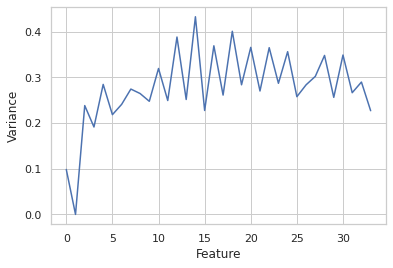

In [46]:
plt.plot(x_train.var(axis = 0))
plt.ylabel('Variance')
plt.xlabel('Feature')
plt.show()

Θα εξετάσουμε την επίδραση ορισμένων παραμέτρων στην επίδοση της ταξινόμησης με τον Naive Bayes ταξινομητή. Βελτιστοποιήσαμε το πλήθος των components, το φίλτρο για στήλες χαμηλής διακύμανσης και παραθέτουμε τα αποτελέσματα για τις μετρικές f1-micro και f-macro.

Σημειώνουμε πως επειδή πρόκειται για πρόβλημα δυαδικής ταξινόμησης, περιμένουμε και οι 2 μετρικές να μας δίνουν το ίδιο αποτέλεσμα, πράγμα που συμβαίνει:

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [51]:
vthreshold = [0, 0.1, 0.2, 0.3]
n_components = [20, 21, 22, 23, 24, 25, 26]
start_time = time.time()

gscv = GridSearchCV(pipe,
                 dict(selector__threshold=vthreshold,
                      pca__n_components=n_components),
                 cv = 10,
                 scoring = 'f1_micro',
                 n_jobs = -1
                )
gscv.fit(x_train,y_train)
preds = gscv.predict(x_test)

Συνολικός χρόνος τρεξίματος: 10.230865001678467
              precision    recall  f1-score   support

 good_signal       0.88      0.91      0.89        23
  bad_signal       0.96      0.94      0.95        48

    accuracy                           0.93        71
   macro avg       0.92      0.93      0.92        71
weighted avg       0.93      0.93      0.93        71



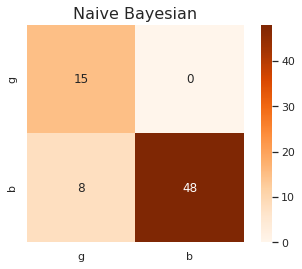

In [52]:
print('Συνολικός χρόνος τρεξίματος:' ,time.time() - start_time)
print(classification_report(y_test,preds,target_names=target_names))

confusion = confusion_matrix(y_test, pred)

hmap = sns.heatmap(
     confusion.T,
     cmap = 'Oranges',
     square = True,
     annot = True, 
     fmt = 'd',
     cbar = True,
     xticklabels = ['g','b'],
     yticklabels = ['g','b'])

plt.title("Naive Bayesian", fontsize=16) 
plt.show()

Ο παραπάνω, είναι o confusion matrix για βελτιστοποίηση του f1-micro score και από κάτω είναι οι παράμετροι που δίνουν τη μεγαλύτερη ακρίβεια.

In [54]:
gscv.best_params_

{'pca__n_components': 22, 'selector__threshold': 0}

Επαναλαμβάνουμε, όπως προαναφέρθηκε, το grid search, βελτιστοποιώντας το f1-macro score.

In [59]:
vthreshold = [0 , 0.1 , 0.2, 0.3]
n_components = [5,21,22,25,26,33]

gscv = GridSearchCV(pipe,
                 dict(selector__threshold=vthreshold, pca__n_components=n_components),
                 cv = 10,
                 scoring = 'f1_macro',
                 n_jobs = -1
                )
gscv.fit(x_train,y_train)
preds = gscv.predict(x_test)

              precision    recall  f1-score   support

 good_signal       0.88      0.91      0.89        23
  bad_signal       0.96      0.94      0.95        48

    accuracy                           0.93        71
   macro avg       0.92      0.93      0.92        71
weighted avg       0.93      0.93      0.93        71



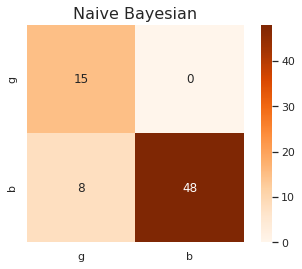

In [60]:
print(classification_report(y_test,preds,target_names=target_names))
confusion = confusion_matrix(y_test, pred)

hmap = sns.heatmap(
     confusion.T,
     cmap = 'Oranges',
     square = True,
     annot = True, 
     fmt = 'd',
     cbar = True,
     xticklabels = ['g','b'],
     yticklabels = ['g','b'])

plt.title("Naive Bayesian", fontsize=16) 
plt.show()

### K Nearest Neighbors

Τώρα θα δούμε πως ταξινομούν οι Κ Nearest Neighbors ταξινομητές το Ionosphere Dataset.

Για αρχή τρέχουμε έναν απλό KNN Classifier για baseline classification και στη συνέχεια βελτιστοποιούμε τις επιθυμητές παραμέτρους, μέσω grid search:

In [61]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
preds = knn.predict(x_test)
print(classification_report(y_test,preds,target_names=target_names))

              precision    recall  f1-score   support

 good_signal       0.94      0.74      0.83        23
  bad_signal       0.89      0.98      0.93        48

    accuracy                           0.90        71
   macro avg       0.92      0.86      0.88        71
weighted avg       0.91      0.90      0.90        71



Ας δούμε τι ακρίβεια πετυχαίνουμε, πειραματιζόμενοι με τις διαθέσιμες παραμέτρους του grid search:

In [67]:
pca = PCA()
selector = VarianceThreshold(threshold=0.2)
scaler = StandardScaler()
ros = RandomOverSampler(sampling_strategy=1)

pipe = Pipeline(steps =[('pca',pca), 
                        #('scaler',scaler),
                        ('selector',selector), 
                        ('knn',knn)],
                        memory='tmp')

vthreshold = [0, 0.1, 0.2, 0.3]
n_components = [5,21,22,25,26,33]
neighbors = [1,2,3,4,5,6,7]

start_time = time.time()
gknn = GridSearchCV(
    pipe,
    dict(selector__threshold = vthreshold, 
         pca__n_components = n_components,
         knn__n_neighbors = neighbors),
    scoring='f1_micro',
    cv=10,
    n_jobs=-1,
    return_train_score = True
)

gknn.fit(x_train, y_train)
gknn.predict(x_test)

print('Συνολικός χρόνος τρεξίματος:' ,time.time() - start_time)
print(classification_report(y_test,pred))

#print(gknn.best_score_)

Συνολικός χρόνος τρεξίματος: 14.502183437347412
              precision    recall  f1-score   support

         0.0       1.00      0.65      0.79        23
         1.0       0.86      1.00      0.92        48

    accuracy                           0.89        71
   macro avg       0.93      0.83      0.86        71
weighted avg       0.90      0.89      0.88        71



In [68]:
print(gknn.best_params_)

{'knn__n_neighbors': 2, 'pca__n_components': 5, 'selector__threshold': 0}


Παρατηρούμε ότι ο kNN classifier ταξινομεί αποδοτικότερα στους 2 κοντινότερους γείτονες. H baseline ταξινόμηση, απέδωσε καλύτερα από το grid search! Το dataset είναι αρκετά απλό. Συνεχίζουμε με το δεύτερο και μεγαλύτερο dataset.

# Isolet Dataset

Λίγα λόγια για την προέλευση των δεδομένων:
<div class="alert alert-block alert-success">
Τα δεδομένα του Isolet dataset συλλέχθηκαν ως εξής: 150 συμμετέχοντες προέφεραν τους **26 φθόγγους** του λατινικού αλφαβήτου, 2 φορές τον καθένα. Συνεπώς **για κάθε συμμετέχοντα**, ηχογραφήθηκαν **52 παρατηρήσεις**. Τρεις παρατηρήσεις λέιπουν, πιθανά λόγω δυσκολίας στην ηχογράφηση. Το dataset επομένως περιέχει $150\cdot 52 - 3 = \boldsymbol{7797}$ **παρατηρήσεις**.
<br><br>
Η κάθε ηχογράφηση κωδικοποιήθηκε σε 617 πραγματικές μεταβλητές και κατηγοριοποιήθηκε σε μια νέα στήλη που περιέχει έναν κωδικό για κάθε φθόγγο. Άρα το dataset περιλαμβάνει **618 στήλες**.
</div>
<br>
`Παραχωρήθηκε από:`

> *Department of Computer Science, Oregon State University, Corvallis*.



`Σχετικά Άρθρα:`

> 1. S Fanty, M., Cole, R. (1991).
<br>
*Spoken letter recognition. In Lippman, R. P., Moody, J., and Touretzky, D. S. (Eds).
<br>
Advances in Neural Information Processing Systems 3. San Mateo, CA: Morgan Kaufmann.*

>2. Dietterich, T. G., Bakiri, G. (1991)
<br>
*Error-correcting output codes: A general method for improving multiclass inductive learning programs.
<br>
Proceedings of the Ninth National Conference on Artificial Intelligence (AAAI-91), Anaheim, CA: AAAI Press.*

>3. Dietterich, T. G., Bakiri, G. (1994)
<br>
*Solving Multiclass Learning Problems via Error-Correcting Output Codes. *

<p style="text-align: right;"> Πηγή: https://archive.ics.uci.edu/ml/datasets/isolet </p>

## Προεπεξεργασία του Dataset

### Μια πρώτη ματιά

Το dataframe περιέχει **618 στήλες**-attributes. Ξεκινούμε την εξερεύνηση του dataset, τυπώνοντας μια στατιστική περίληψη των attributes:

In [11]:
df = pd.read_csv('isolet_ds.csv')
#στατιστικά των 617 ποσοτικών μεταβλητων-στηλών
df.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f470,f471,f472,f473,f474,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521,f522,f523,f524,f525,f526,f527,f528,f529,f530,f531,f532,f533,f534,f535,f536,f537,f538,f539,f540,f541,f542,f543,f544,f545,f546,f547,f548,f549,f550,f551,f552,f553,f554,f555,f556,f557,f558,f559,f560,f561,f562,f563,f564,f565,f566,f567,f568,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f602,f603,f604,f605,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617
count,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000

In [12]:
#και η 618η στήλη της κατηγοριοποίησης
pd.DataFrame(df['label']).transpose()

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
label  '1'  '1'  '2'  '2'  '3'  '3'  '4'  '4'  '5'  '5'  '6'  '6'  '7'  '7'   

        14   15   16   17    18    19    20    21    22    23    24    25  \
label  '8'  '8'  '9'  '9'  '10'  '10'  '11'  '11'  '12'  '12'  '13'  '13'   

         26    27    28    29    30    31    32    33    34    35    36    37  \
label  '14'  '14'  '15'  '15'  '16'  '16'  '17'  '17'  '18'  '18'  '19'  '19'   

         38    39    40    41    42    43    44    45    46    47    48    49  \
label  '20'  '20'  '21'  '21'  '22'  '22'  '23'  '23'  '24'  '24'  '25'  '25'   

         50    51   52   53   54   55   56   57   58   59   60   61   62   63  \
label  '26'  '26'  '1'  '1'  '2'  '2'  '3'  '3'  '4'  '4'  '5'  '5'  '6'  '6'   

        64   65   66   67   68   69    70    71    72    73    74    75    76  \
label  '7'  '7'  '8'  '8'  '9'  '9'  '10'  '10'  '11'  '11'  '12'  '12'  '13'   

         77    78    79    80    81    82    83    84    85    86    87    88  \
label  '13'  '14'  '14'  '15'  '15'  '16'  '16'  '17'  '17'  '18'  '18'  '19'   

         89    90    91    92    93    94    95    96    97    98    99   100  \
label  '19'  '20'  '20'  '21'  '21'  '22'  '22'  '23'  '23'  '24'  '24'  '25'   

        101   102   103  104  105  106  107  108  109  110  111  112  113  \
label  '25'  '26'  '26'  '1'  '1'  '2'  '2'  '3'  '3'  '4'  '4'  '5'  '5'   

       114  115  116  117  118  119  120  121   122   123   124   125   126  \
label  '6'  '6'  '7'  '7'  '8'  '8'  '9'  '9'  '10'  '10'  '11'  '11'  '12'   

        127   128   129   130   131   132   133   134   135   136   137   138  \
label  '12'  '13'  '13'  '14'  '14'  '15'  '15'  '16'  '16'  '17'  '17'  '18'   

        139   140   141   142   143   144   145   146   147   148   149   150  \
label  '18'  '19'  '19'  '20'  '20'  '21'  '21'  '22'  '22'  '23'  '23'  '24'   

        151   152   153   154   155  156  157  158  159  160  161  162  163  \
label  '24'  '25'  '25'  '26'  '26'  '1'  '1'  '2'  '2'  '3'  '3'  '4'  '4'   

       164  165  166  167  168  169  170  171  172  173   174   175   176  \
label  '5'  '5'  '6'  '6'  '7'  '7'  '8'  '8'  '9'  '9'  '10'  '10'  '11'   

        177   178   179   180   181   182   183   184   185   186   187   188  \
label  '11'  '12'  '12'  '13'  '13'  '14'  '14'  '15'  '15'  '16'  '16'  '17'   

        189   190   191   192   193   194   195   196   197   198   199   200  \
label  '17'  '18'  '18'  '19'  '19'  '20'  '20'  '21'  '21'  '22'  '22'  '23'   

        201   202   203   204   205   206   207  208  209  210  211  212  213  \
label  '23'  '24'  '24'  '25'  '25'  '26'  '26'  '1'  '1'  '2'  '2'  '3'  '3'   

       214  215  216  217  218  219  220  221  222  223  224  225   226   227  \
label  '4'  '4'  '5'  '5'  '6'  '6'  '7'  '7'  '8'  '8'  '9'  '9'  '10'  '10'   

        228   229   230   231   232   233   234   235   236   237   238   239  \
label  '11'  '11'  '12'  '12'  '13'  '13'  '14'  '14'  '15'  '15'  '16'  '16'   

        240   241   242   243   244   245   246   247   248   249   250   251  \
label  '17'  '17'  '18'  '18'  '19'  '19'  '20'  '20'  '21'  '21'  '22'  '22'   

        252   253   254   255   256   257   258   259  260  261  262  263  \
label  '23'  '23'  '24'  '24'  '25'  '25'  '26'  '26'  '1'  '1'  '2'  '2'   

       264  265  266  267  268  269  270  271  272  273  274  275  276  277  \
label  '3'  '3'  '4'  '4'  '5'  '5'  '6'  '6'  '7'  '7'  '8'  '8'  '9'  '9'   

        278   279   280   281   282   283   284   285   286   287   288   289  \
label  '10'  '10'  '11'  '11'  '12'  '12'  '13'  '13'  '14'  '14'  '15'  '15'   

        290   291   292   293   294   295   296   297   298   299   300   301  \
label  '16'  '16'  '17'  '17'  '18'  '18'  '19'  '19'  '20'  '20'  '21'  '21'   

        302   303   304   305   306   307   308   309   310   311  312  313  \
label  '22'  '22'  '23'  '23'  '24'  '24'  '25'  '25'  '26'  '26' 

Αφαιρούμε τα single quotes, από τα ονόματα των κλάσεων (φθόγγων) στη στήλη `label`:

In [4]:
# df['label'] = df['label'].str.replace('\'','')
# pd.DataFrame(df['label']).transpose()

0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17  18  19  20  21  \
label  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9  10  10  11  11   

       22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  \
label  12  12  13  13  14  14  15  15  16  16  17  17  18  18  19  19  20  20   

       40  41  42  43  44  45  46  47  48  49  50  51 52 53 54 55 56 57 58 59  \
label  21  21  22  22  23  23  24  24  25  25  26  26  1  1  2  2  3  3  4  4   

      60 61 62 63 64 65 66 67 68 69  70  71  72  73  74  75  76  77  78  79  \
label  5  5  6  6  7  7  8  8  9  9  10  10  11  11  12  12  13  13  14  14   

       80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  \
label  15  15  16  16  17  17  18  18  19  19  20  20  21  21  22  22  23  23   

       98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115  \
label  24  24  25  25  26  26   1   1   2   2   3   3   4   4   5   5   6   6   

      116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133  \
label   7   7   8   8   9   9  10  10  11  11  12  12  13  13  14  14  15  15   

      134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151  \
label  16  16  17  17  18  18  19  19  20  20  21  21  22  22  23  23  24  24   

      152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169  \
label  25  25  26  26   1   1   2   2   3   3   4   4   5   5   6   6   7   7   

      170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187  \
label   8   8   9   9  10  10  11  11  12  12  13  13  14  14  15  15  16  16   

      188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205  \
label  17  17  18  18  19  19  20  20  21  21  22  22  23  23  24  24  25  25   

      206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223  \
label  26  26   1   1   2   2   3   3   4   4   5   5   6   6   7   7   8   8   

      224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241  \
label   9   9  10  10  11  11  12  12  13  13  14  14  15  15  16  16  17  17   

      242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259  \
label  18  18  19  19  20  20  21  21  22  22  23  23  24  24  25  25  26  26   

      260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277  \
label   1   1   2   2   3   3   4   4   5   5   6   6   7   7   8   8   9   9   

      278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295  \
label  10  10  11  11  12  12  13  13  14  14  15  15  16  16  17  17  18  18   

      296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313  \
label  19  19  20  20  21  21  22  22  23  23  24  24  25  25  26  26   1   1   

      314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331  \
label   2   2   3   3   4   4   5   5   6   6   7   7   8   8   9   9  10  10   

      332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349  \
label  11  11  12  12  13  13  14  14  15  15  16  16  17  17  18  18  19  19   

      350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367  \
label  20  20  21  21  22  22  23  23  24  24  25  25  26  26   1   1   2   2   

      368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385  \
label   3   3   4   4   5   5   6   6   7   7   8   8   9   9  10  10  11  11   

      386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403  \
label  12  12  13  13  14  14  15  15  16  16  17  17  18  18  19  19  20  20   

      404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421  \
label  21  21  22  22  23  23  24  24  25  25  26  26   1   1   2   2   3   3   

      422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439  \
label   4   4   5   5   6   6   7   7   8   8   9   9  10  10  11  11  12  12   

      440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457  \
label  13  13  14  14 

### Περιττά Δεδομένα & ΝAs

Μελετώντας την παραπάνω στατιστική περίληψη των μεταβλητών, παρατηρούμε ότι δεν υπάρχει σταθερή στήλη (μας επιστρέφεται μια κενή λίστα):

In [6]:
#df.loc[:, (df != df.iloc[0]).any()].count()
df.columns[df.nunique() < 2] #πόσες στήλες έχουν 1 τιμή; (σταθερές)

Index([], dtype='object')

Επιπλέον, επιβεβαιώνουμε την πληροφορία από το description του dataset, ότι **δεν περιέχει missing values** (NAs):

In [7]:
df.isna().any().any()

False

### Κωδικοποίηση των labels



In [13]:
df['label'] = df.label.astype('category')

In [10]:
#df.loc['label'].value_counts()
df.select_dtypes(exclude = np.number) #πόσες μεταβ. δεν είναι αριθμητικές;

,label
0,1
1,1
2,2
3,2
4,3
...,...
7792,24
7793,25
7794,25
7795,26


### Κατανομή των labels

Ας εξετάσουμε αν το dataset μας είναι ισορροπημένο:

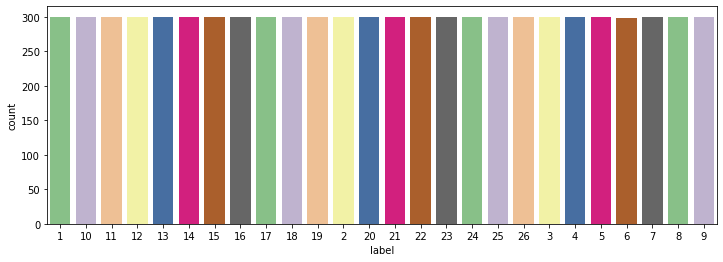

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(x = 'label', data = df, palette = "Accent")

In [12]:
pd.DataFrame(df['label'].value_counts()).transpose() # (α) στη στήλη label

,9,8,10,11,12,14,15,16,17,18,19,2,20,21,22,23,24,25,26,3,4,5,7,1,13,6
label,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,299,298


Καθαρά Ισορροπημένο το dataset μας.

### Seperation & Split

Χωρίζουμε τις ανεξάρτητες από τις εξαρτημένες μεταβλητές (seperation). Η είσοδος Χ θα έχει **617 μεταβλητές** και **7797 παρατηρήσεις** και η έξοδος y θα είναι ένα διάνυσμα με τον ίδιο αριθμό παρατηρήσεων:

In [14]:
X = df.values[:, :-1]
y = df.values[:, -1]

print(X.shape,y.shape)

(7797, 617) (7797,)


Υλοποιούμε το **διαχωρισμό** του dataset, σε **train** και **test** set (split), και κανονικοποιούμε τις παρατηρήσεις (scale), με τη βοήθεια των `train_test_split` και `StandardScaler` αντίστοιχα, από τη βιβλιοθήκη `sklearn`:

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

## Ταξινόμηση

### Baseline Classification

Εκτελούμε ορισμένες dummy στρατηγικές ταξινόμησης του dataset μας. Οι dummy classifiers ταξινομούν με κάποιους απλούς κανόνες-στρατηγικές τα δεδομένα. Χρησιμοποιούνται ως benchmarks για το scaling και ranking άλλων μοντέλων.


Θα χρησιμοποιήσουμε τον `DummyClassifier`της sklearn για να εξετάσουμε την ακρίβεια όλων των διαθέσιμων στρατηγικών:

In [32]:
strategies = ['most_frequent', 'stratified', 'uniform', 'constant'] 

con_matrix = []
dummy_score = [] 

for s in strategies: 
    if s =='constant': 
        dclf = DummyClassifier(strategy = s, random_state = 0, constant = '3') # se poia stathera-gramma paei kalutera?
    else: 
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(x_train, y_train)
    score = dclf.score(x_test, y_test) 
    dummy_score.append(score) 
    con_matrix.append(confusion_matrix(y_test, dclf.predict(x_test)))    

Απεικονίζουμε τους πίνακες σύγχυσης για όλες τις dummy στρατηγικές:

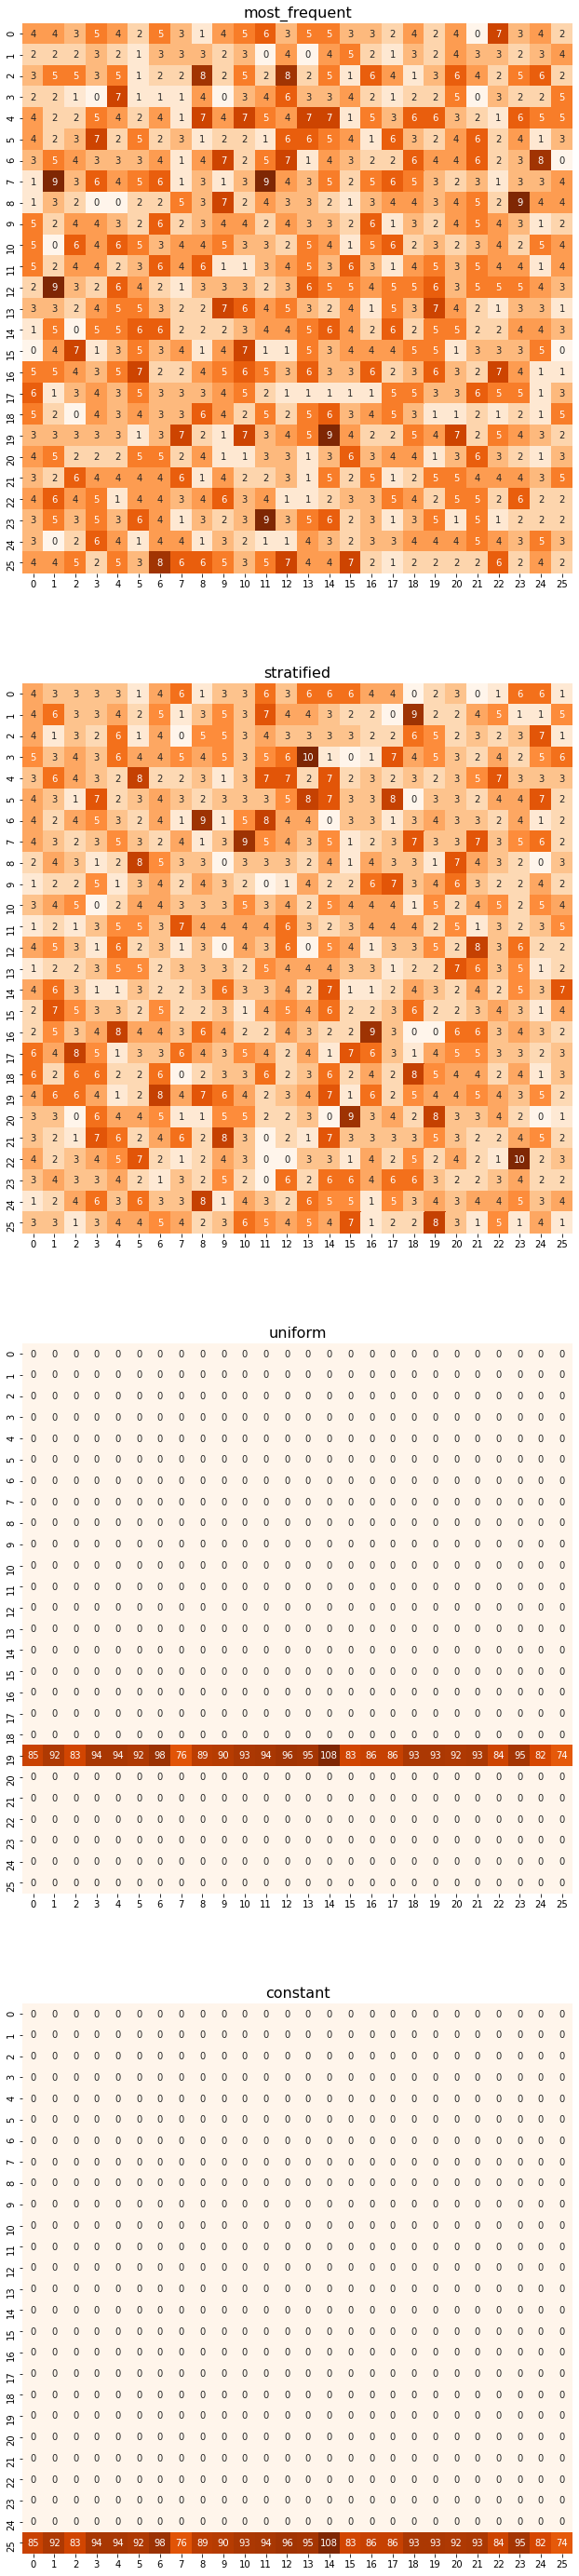

In [34]:
fig, ax_lst = plt.subplots(4,1,figsize=(50,50))

for i,ax in zip(range(4), ax_lst.flat):
    hmap = sns.heatmap(
         con_matrix[i].T,
         cmap = 'Oranges',
         square = True,
         annot = True, 
         fmt = 'd',
         cbar = False)
         #xticklabels = ['b','g'],
         #yticklabels = ['b','g'])

    # Plot heatmap
    plt.sca(ax) # make the ax object the "current axes"
    plt.title(strategies[i], fontsize=16)
    
plt.show()

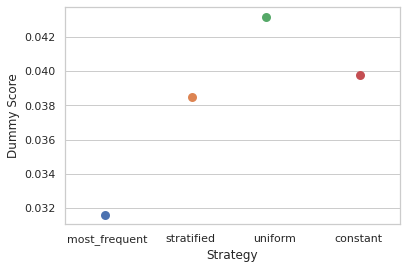

In [35]:
sns.set_theme(style = "whitegrid")
ax = sns.stripplot(x = strategies, y = dummy_score, size = 9); 
ax.set(xlabel = 'Strategy', ylabel = 'Dummy Score') 
plt.show() 

### Gaussian Naive Bayes

Ας δούμε πως ταξινομεί τα δεδομένα μας ο NB:

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import time

#### Ένας απλός ΝΒ ταξινομητής

In [37]:
nbclf = GaussianNB()

start_time = time.time()
model = nbclf.fit(x_train,y_train)
pred = model.predict(x_test)

Συνολικος χρονος τρεξιματος 19.642003059387207
              precision    recall  f1-score   support

           1       0.79      0.98      0.87        85
          10       0.96      0.80      0.88        92
          11       0.81      0.95      0.87        83
          12       0.89      0.98      0.93        94
          13       0.87      0.80      0.83        94
          14       0.82      0.79      0.81        92
          15       0.99      0.88      0.93        98
          16       0.94      0.58      0.72        76
          17       0.95      0.98      0.96        89
          18       0.91      0.82      0.87        90
          19       0.95      0.95      0.95        93
           2       0.71      0.37      0.49        94
          20       0.73      0.85      0.78        96
          21       0.97      0.95      0.96        95
          22       0.85      0.69      0.77       108
          23       0.72      0.99      0.83        83
          24       0.78      0.98 

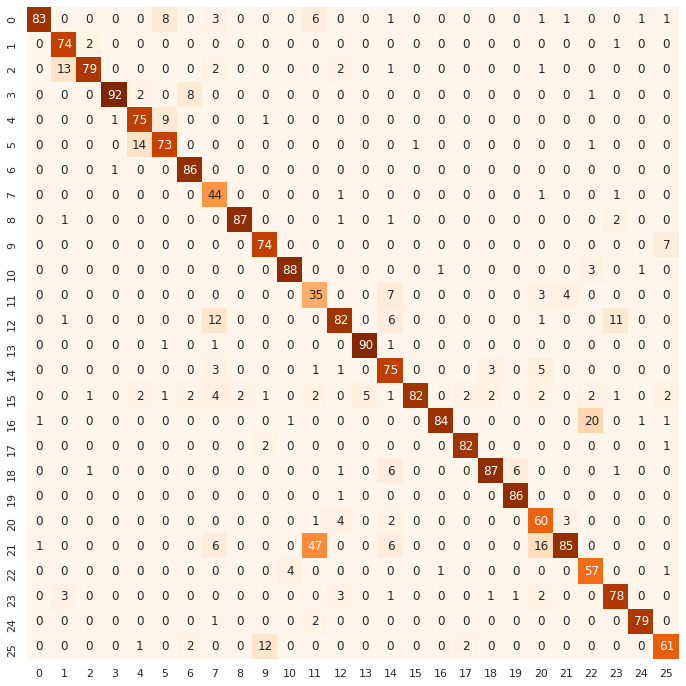

In [38]:
print('Συνολικος χρονος τρεξιματος' ,time.time() - start_time)

print(classification_report(y_test,pred))

fig, ax_lst = plt.subplots(1,1,figsize=(12,12))
confusion = confusion_matrix(y_test, pred)
print('Confusion matrix for kNN:')
sns.heatmap(
     confusion.T,
     cmap = 'Oranges',
     square = True,
     annot = True, 
     fmt = 'd',
     cbar = False)

#### Grid Search με ΝΒ

Υλοποιούμε ένα pipeline και στη συνέχεια ταξινομούμε μόνο με αυτό και ύστερα με Grid Search για f1-micro και f2-macro βελτιστοποίηση. Παραθέτουμε classification reports και confusion matrices για κάθε πείραμα.

In [46]:
selector = VarianceThreshold(threshold=0)
pca = PCA(n_components=150)
scaler = StandardScaler()

pipe = Pipeline(steps =[('pca',pca),
                        ('scaler',scaler), 
                        ('selector',selector),
                        ('bayesian',nbclf)],memory='tmp')

pipe.fit(x_train,y_train)
pred = pipe.predict(x_test)

              precision    recall  f1-score   support

           1       0.94      0.98      0.96        85
          10       0.95      0.95      0.95        92
          11       0.97      0.92      0.94        83
          12       0.95      0.97      0.96        94
          13       0.90      0.93      0.91        94
          14       0.87      0.91      0.89        92
          15       0.98      0.95      0.96        98
          16       0.79      0.87      0.82        76
          17       0.98      0.96      0.97        89
          18       0.97      0.94      0.96        90
          19       0.99      0.90      0.94        93
           2       0.81      0.86      0.84        94
          20       0.92      0.79      0.85        96
          21       0.97      0.95      0.96        95
          22       0.83      0.83      0.83       108
          23       0.78      0.99      0.87        83
          24       0.99      0.98      0.98        86
          25       0.98    

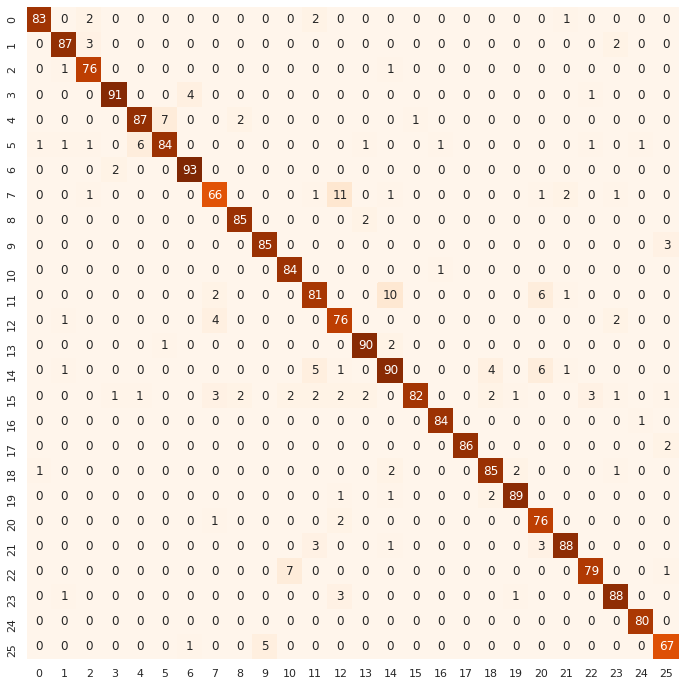

In [48]:
print(classification_report(y_test,pred))
fig, ax_lst = plt.subplots(1,1,figsize=(12,12))
confusion = confusion_matrix(y_test, pred)
print('Confusion matrix for NB:')
sns.heatmap(
     confusion.T,
     cmap = 'Oranges',
     square = True,
     annot = True, 
     fmt = 'd',
     cbar = False)

In [50]:
vthreshold = [0.1, 0.2, 0.3]
n_components = [147,148,149,150,151]

start_time = time.time()

grid = GridSearchCV(
    pipe,
    dict(selector__threshold=vthreshold, 
         pca__n_components=n_components,),
    scoring = 'f1_macro',
    cv = 5,
    n_jobs = -1,
)

grid.fit(x_train, y_train)
pred = grid.predict(x_test)

/home/tzanakakis/.local/lib/python3.6/site-packages/imblearn/pipeline.py:233: UserWarning: Persisting input arguments took 14.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name]


Συνολικος χρονος τρεξιματος: 557.8478426933289
              precision    recall  f1-score   support

           1       0.94      0.98      0.96        85
          10       0.95      0.98      0.96        92
          11       0.99      0.93      0.96        83
          12       0.97      0.97      0.97        94
          13       0.89      0.93      0.91        94
          14       0.86      0.90      0.88        92
          15       0.98      0.97      0.97        98
          16       0.80      0.87      0.83        76
          17       0.99      0.96      0.97        89
          18       0.97      0.96      0.96        90
          19       0.99      0.89      0.94        93
           2       0.83      0.86      0.84        94
          20       0.93      0.79      0.85        96
          21       0.97      0.96      0.96        95
          22       0.84      0.86      0.85       108
          23       0.78      0.99      0.87        83
          24       1.00      0.98 

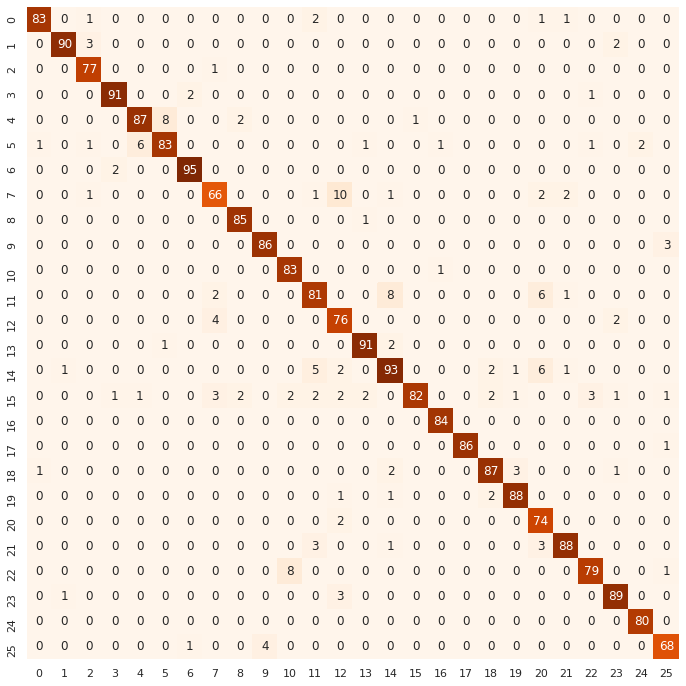

In [51]:
print('Συνολικος χρονος τρεξιματος:' ,time.time() - start_time)
print(classification_report(y_test,pred))
fig, ax_lst = plt.subplots(1,1,figsize=(12,12))
confusion = confusion_matrix(y_test, pred)
print('Confusion matrix for NB:')
sns.heatmap(
     confusion.T,
     cmap = 'Oranges',
     square = True,
     annot = True, 
     fmt = 'd',
     cbar = False)

### K Nearest Neighbors


Τώρα θα δούμε πως ταξινομούν οι Κ Nearest Neighbors ταξινομητές.

#### Ένας απλός ΚΝΝ ταξινομητής
Ξεκινάμε με έναν απλό KNN ταξινομητή και συνεχίζουμε, βελτιστοποιώντας τις παραμέτρους μέσω grid search:

In [17]:
from sklearn.neighbors import KNeighborsClassifier 

In [19]:
nclf = KNeighborsClassifier() 
nclf.fit(x_train,y_train)
pred = nclf.predict(x_test)

              precision    recall  f1-score   support

         '1'       0.90      1.00      0.95        85
        '10'       0.83      0.98      0.90        92
        '11'       0.96      0.83      0.89        83
        '12'       0.97      0.99      0.98        94
        '13'       0.85      0.82      0.83        94
        '14'       0.84      0.80      0.82        92
        '15'       0.99      1.00      0.99        98
        '16'       0.57      0.78      0.66        76
        '17'       0.98      0.99      0.98        89
        '18'       0.98      1.00      0.99        90
        '19'       0.93      0.87      0.90        93
         '2'       0.69      0.86      0.76        94
        '20'       0.80      0.73      0.77        96
        '21'       0.96      0.96      0.96        95
        '22'       0.85      0.67      0.75       108
        '23'       1.00      0.94      0.97        83
        '24'       0.99      0.99      0.99        86
        '25'       0.98    

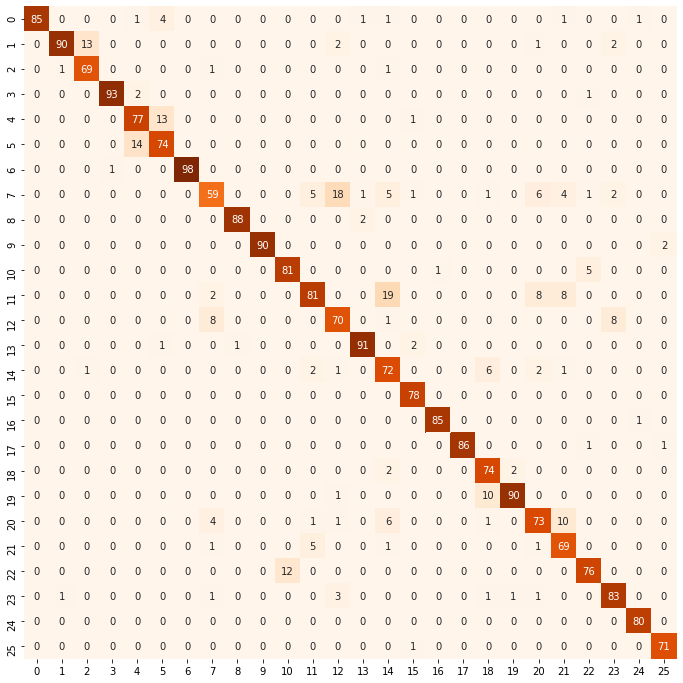

In [23]:
print(classification_report(y_test,pred))
fig, ax_lst = plt.subplots(1,1,figsize=(12,12))
confusion = confusion_matrix(y_test, pred)
print('Confusion matrix for KNN:')
sns.heatmap(
     confusion.T,
     cmap = 'Oranges',
     square = True,
     annot = True, 
     fmt = 'd',
     cbar = False)

#### Grid Search με KNN

In [64]:
selector = VarianceThreshold()
pca = PCA()

pipe = Pipeline(steps =[ ('pca',pca), ('selector',selector), ('knn',nclf)] , memory='tmp')

vthreshold = [0.3, 0.35, 0.4]
n_components = [40,60,80]
n_neighbors = [13,14,15]

start_time = time.time()
knn = GridSearchCV(
    pipe,
    dict(selector__threshold=vthreshold,pca__n_components=n_components, knn__n_neighbors=n_neighbors),
    scoring='f1_micro',
    cv=5,
    n_jobs=-1
)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print('Συνολικός χρόνος τρεξίματος:' ,time.time() - start_time)

Συνολικός χρόνος τρεξίματος: 32.65488815307617


/home/tzanakakis/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         '1'       0.86      1.00      0.92         6
        '10'       0.57      1.00      0.73         4
        '11'       1.00      0.50      0.67         2
        '12'       1.00      1.00      1.00         5
        '13'       0.50      1.00      0.67         5
        '14'       0.00      0.00      0.00         4
        '15'       0.50      1.00      0.67         1
        '16'       0.00      0.00      0.00         3
        '17'       1.00      1.00      1.00         3
        '18'       1.00      1.00      1.00         4
        '19'       0.79      0.92      0.85        12
         '2'       0.56      0.62      0.59         8
        '20'       0.44      0.67      0.53         6
        '21'       1.00      0.80      0.89         5
        '22'       0.80      0.67      0.73         6
        '23'       1.00      0.67      0.80         9
        '24'       0.67      0.67      0.67         3
        '25'       1.00    

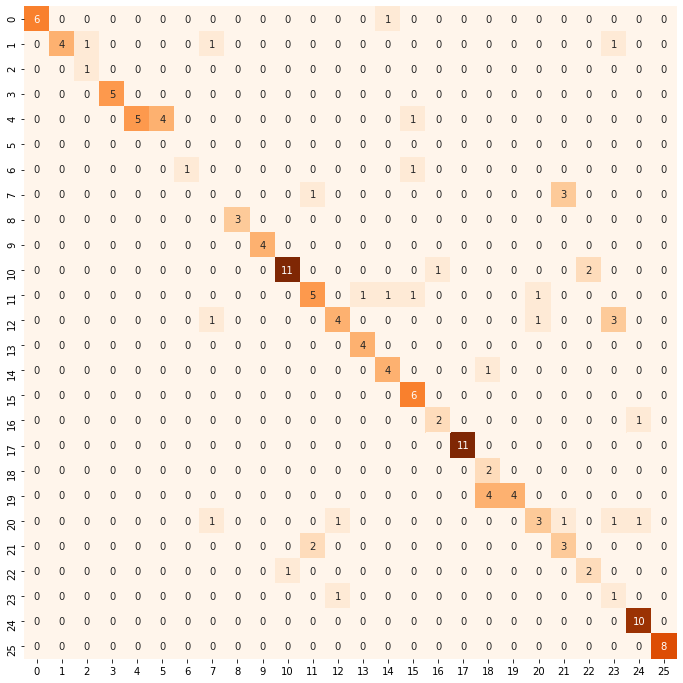

In [65]:
print(classification_report(y_test,pred))

fig, ax_lst = plt.subplots(1,1,figsize=(12,12))
confusion = confusion_matrix(y_test, pred)
print('Confusion matrix for kNN:')
sns.heatmap(
     confusion.T,
     cmap = 'Oranges',
     square = True,
     annot = True, 
     fmt = 'd',
     cbar = False)

In [66]:
print(knn.best_params_)

{'knn__n_neighbors': 14, 'pca__n_components': 60, 'selector__threshold': 0.35}


Παρατηρούμε ότι ο kNN classifier ταξινομεί αποδοτικότερα στους  κοντινότερους γείτονες.

### SVM

Θα ταξινομήσουμε το Isolet Dataset με χρήση του SVM Classifier. Υλοποιούμε 2 grid search, βελτιστοποιώντας τις f1-micro και f1-macro μετρικές αντίστοιχα:

In [33]:
from sklearn.svm import SVC
from sklearn.utils import shuffle

In [36]:
sdata, starget = shuffle(X, y, random_state=64327)
samples = 3000

data = sdata[0:samples-1,:]
target = starget[0:samples-1]

x_train, x_test, y_train, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size = 0.3, 
                                                    random_state=74)
selector = VarianceThreshold()
pca = PCA()
svc = SVC(class_weight='balanced')

pipe = Pipeline(steps =[ ('pca',pca), ('selector',selector), ('svc',svc)],memory='tmp')

param_grid = {
    'pca__n_components': [265, 270, 275],
    'svc__kernel':['linear','poly','sigmoid','rbf'],
    #'svc__kernel':['rbf','linear'],
    'svc__C':[1,2,3,4],
    'svc__gamma': [0.0045,0.005,0.0055]
}

start_time = time.time()

grid = GridSearchCV(
    pipe,
    param_grid,
    scoring='f1_micro',
    cv=5,
    n_jobs=-1
    )

grid.fit(x_train, y_train)
pred = grid.predict(x_test)
print('Συνολικός χρόνος τρεξίματος:' ,time.time() - start_time)

Συνολικός χρόνος τρεξίματος: 233.48862314224243


              precision    recall  f1-score   support

         '1'       0.86      1.00      0.92         6
        '10'       0.80      1.00      0.89         4
        '11'       0.67      1.00      0.80         2
        '12'       1.00      1.00      1.00         5
        '13'       0.80      0.80      0.80         5
        '14'       0.75      0.75      0.75         4
        '15'       1.00      1.00      1.00         1
        '16'       0.00      0.00      0.00         3
        '17'       1.00      1.00      1.00         3
        '18'       1.00      1.00      1.00         4
        '19'       0.92      1.00      0.96        12
         '2'       1.00      0.75      0.86         8
        '20'       0.75      1.00      0.86         6
        '21'       1.00      1.00      1.00         5
        '22'       0.71      0.83      0.77         6
        '23'       1.00      1.00      1.00         9
        '24'       1.00      1.00      1.00         3
        '25'       1.00    

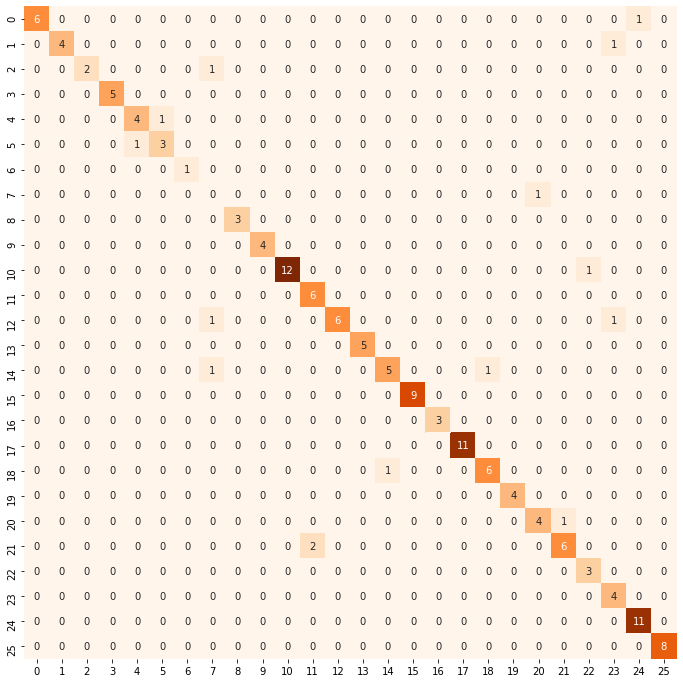

In [38]:
print(classification_report(y_test,pred))

fig, ax_lst = plt.subplots(1,1,figsize=(12,12))
confusion = confusion_matrix(y_test, pred)
print('Confusion matrix for kNN:')
sns.heatmap(
     confusion.T,
     cmap = 'Oranges',
     square = True,
     annot = True, 
     fmt = 'd',
     cbar = False)

In [39]:
print(grid.best_params_)

{'pca__n_components': 270, 'svc__C': 1, 'svc__gamma': 0.0045, 'svc__kernel': 'linear'}


In [41]:
sdata, starget = shuffle(X, y, random_state=64327)
samples = 3000

data = sdata[0:samples-1,:]
target = starget[0:samples-1]

x_train, x_test, y_train, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size = 0.3, 
                                                    random_state=74)

selector = VarianceThreshold()
pca = PCA()
svc = SVC(class_weight='balanced')

pipe = Pipeline(steps =[ ('pca',pca), ('selector',selector), ('svc',svc)],memory='tmp')

param_grid = {
    'pca__n_components': [280, 290, 300, 310, 320],
    #'svc__kernel':['linear','poly','sigmoid','rbf'],
    'svc__kernel':['rbf'],
    'svc__C':[6,7,8,9],
    'svc__gamma': [0.006, 0.0065, 0.007]
}

start_time = time.time()

grid = GridSearchCV(
    pipe,
    param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
    )

grid.fit(x_train, y_train)
pred = grid.predict(x_test)
print('Συνολικός χρόνος τρεξίματος:' ,time.time() - start_time)

Συνολικός χρόνος τρεξίματος: 144.3729124069214


              precision    recall  f1-score   support

         '1'       1.00      1.00      1.00         6
        '10'       0.80      1.00      0.89         4
        '11'       0.67      1.00      0.80         2
        '12'       1.00      1.00      1.00         5
        '13'       0.83      1.00      0.91         5
        '14'       1.00      0.75      0.86         4
        '15'       1.00      1.00      1.00         1
        '16'       0.50      0.33      0.40         3
        '17'       1.00      1.00      1.00         3
        '18'       1.00      1.00      1.00         4
        '19'       0.92      1.00      0.96        12
         '2'       1.00      1.00      1.00         8
        '20'       0.75      1.00      0.86         6
        '21'       1.00      1.00      1.00         5
        '22'       0.83      0.83      0.83         6
        '23'       1.00      1.00      1.00         9
        '24'       1.00      1.00      1.00         3
        '25'       1.00    

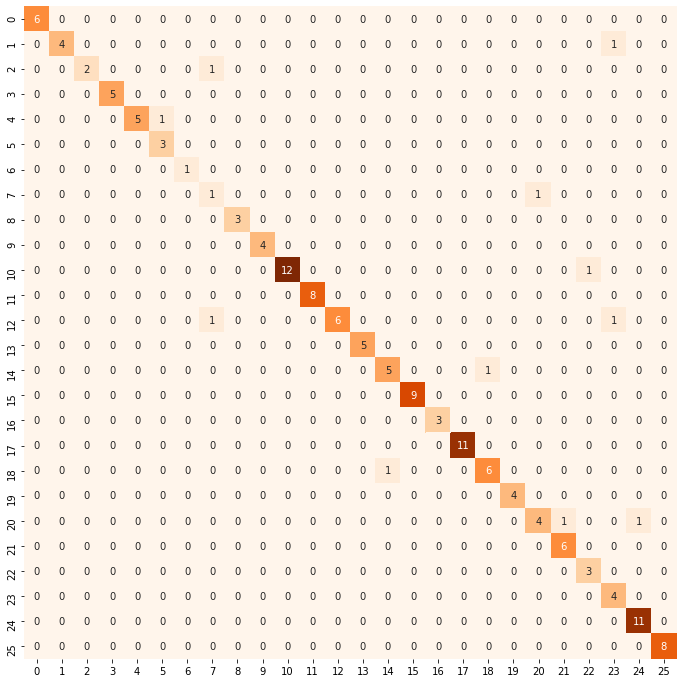

In [43]:
print(classification_report(y_test,pred))

fig, ax_lst = plt.subplots(1,1,figsize=(12,12))
confusion = confusion_matrix(y_test, pred)
print('Confusion matrix for kNN:')
sns.heatmap(
     confusion.T,
     cmap = 'Oranges',
     square = True,
     annot = True, 
     fmt = 'd',
     cbar = False)

### MLP

Τέλος, ταξινομούμε το dataset μας, με τη χρήση MLP (Multi Layer Perceptron) ταξινομητή. Βελτιστοποιούμε τις παραμερους που φαίνονται στη λίστα "param_grid" παρακάτω, μέσω grid search.

In [25]:
from sklearn.neural_network import MLPClassifier

In [27]:
mlp = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(5,) , (15,) , (20,) , (50,) , (100,)], # tuple default (100,).The ith element represents the number of neurons in the ith hidden layer.
    'activation': ['identity', 'logistic', 'tanh', 'relu'], # default ‘relu’
    'solver': ['lbfgs','sgd','adam'], # default ‘adam’
    'learning_rate': ['constant', 'invscaling','adaptive'] # Only used when solver='sgd'.
    #'max_iter': [100,150,200,250],
    #'alpha': [0.0001, 0.002, 0.05]   
}

start_time = time.time()

clf = GridSearchCV(mlp,param_grid,n_jobs=-1,cv=5,scoring='f1_micro')

clf.fit(x_train,y_train)
pred = clf.predict(x_test)
print('Συνολικός χρόνος εκτέλεσης:', time.time()-start_time)

Συνολικός χρόνος εκτέλεσης: 120.91358065605164


              precision    recall  f1-score   support

         '1'       0.99      1.00      0.99        85
        '10'       0.98      1.00      0.99        92
        '11'       1.00      0.98      0.99        83
        '12'       0.98      0.99      0.98        94
        '13'       0.91      0.97      0.94        94
        '14'       0.97      0.90      0.93        92
        '15'       0.99      1.00      0.99        98
        '16'       0.90      0.96      0.93        76
        '17'       0.99      0.99      0.99        89
        '18'       1.00      0.98      0.99        90
        '19'       0.98      0.94      0.96        93
         '2'       0.88      0.89      0.88        94
        '20'       0.99      0.90      0.94        96
        '21'       0.98      0.99      0.98        95
        '22'       0.94      0.89      0.91       108
        '23'       1.00      0.98      0.99        83
        '24'       0.99      0.99      0.99        86
        '25'       0.99    

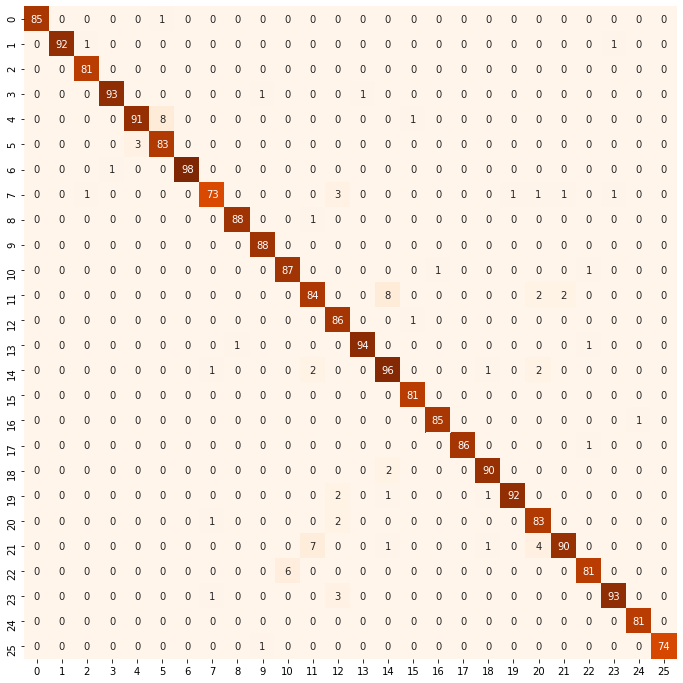

In [28]:
print(classification_report(y_test,pred))

fig, ax_lst = plt.subplots(1,1,figsize=(12,12))
confusion = confusion_matrix(y_test, pred)
print('Confusion matrix for MLP:')
sns.heatmap(
     confusion.T,
     cmap = 'Oranges',
     square = True,
     annot = True, 
     fmt = 'd',
     cbar = False)

In [29]:
print(clf.best_params_) 

{'activation': 'logistic'}


Επαναλαμβάνουμε για f1-macro score:

In [31]:
mlp = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(5,) , (15,) , (20,) , (50,) , (100,)], # tuple default (100,).The ith element represents the number of neurons in the ith hidden layer.
    'activation': ['identity', 'logistic', 'tanh', 'relu'], # default ‘relu’
    'solver': ['lbfgs','sgd','adam'], # default ‘adam’
    'learning_rate': ['constant', 'invscaling','adaptive'] # Only used when solver='sgd'.
    #'max_iter': [100,150,200,250],
    #'alpha': [0.0001, 0.002, 0.05] 
}

start_time = time.time()

clf = GridSearchCV(mlp,param_grid,n_jobs=-1,cv=5,scoring='f1_macro')

clf.fit(x_train,y_train)
clf.predict(x_test)
print('Συνολικός χρόνος εκτέλεσης:', time.time()-start_time)

Συνολικός χρόνος εκτέλεσης: 158.40235328674316


              precision    recall  f1-score   support

         '1'       0.99      1.00      0.99        85
        '10'       0.98      1.00      0.99        92
        '11'       1.00      0.98      0.99        83
        '12'       0.98      0.99      0.98        94
        '13'       0.91      0.97      0.94        94
        '14'       0.97      0.90      0.93        92
        '15'       0.99      1.00      0.99        98
        '16'       0.90      0.96      0.93        76
        '17'       0.99      0.99      0.99        89
        '18'       1.00      0.98      0.99        90
        '19'       0.98      0.94      0.96        93
         '2'       0.88      0.89      0.88        94
        '20'       0.99      0.90      0.94        96
        '21'       0.98      0.99      0.98        95
        '22'       0.94      0.89      0.91       108
        '23'       1.00      0.98      0.99        83
        '24'       0.99      0.99      0.99        86
        '25'       0.99    

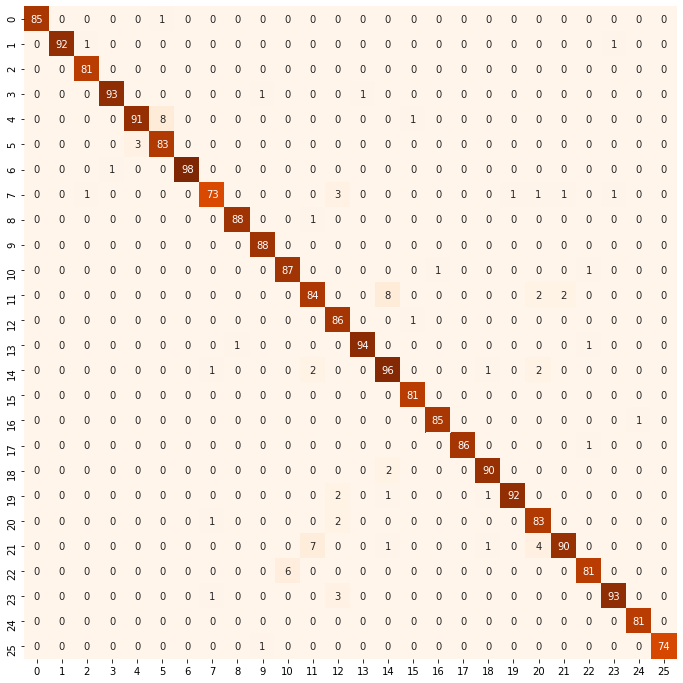

In [32]:
print(classification_report(y_test,pred))

fig, ax_lst = plt.subplots(1,1,figsize=(12,12))
confusion = confusion_matrix(y_test, pred)
print('Confusion matrix for MLP:')
sns.heatmap(
     confusion.T,
     cmap = 'Oranges',
     square = True,
     annot = True, 
     fmt = 'd',
     cbar = False)

> **Τέλος Εργασίας**

Για τον κώδικά μας, χρησιμοποιήσαμε τη `standard` ονοματοδοσία (ακόμη και των μεταβλητών όπου υπάρχει τέτοια) που συναντήσαμε στα πλέον δημοφιλή -σχετικά με το αντικείμενο- sites/forums στο διαδίκτυο (https://www.geeksforgeeks.org/ ,https://stackoverflow.com/, https://www.kaggle.com/, https://towardsdatascience.com/, https://www.w3schools.com/ κα) όσο και στο documentation των βιβλιοθηκών που χρησιμοποιήσαμε (numpy, pandas, seaborn, pyplot, sklearn, torch κλπ).

Στο πλαίσιο των απαιτήσεων της εργασίας παραλείπουμε την αναλυτική αναφορά σε πηγές.